### import ライブラリ

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

### データセットの用意

In [2]:
# データセットの用意
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [3]:
# # データセットの用意
# iris = load_iris()

# X = pd.DataFrame(iris.data)[50:].values
# X = X[:,[2,3]]
# target = pd.DataFrame(iris.target)[50:].values
# target = np.where(target < 2, -1, 1)

# feature_names = pd.DataFrame(iris.feature_names)
# target_names = pd.DataFrame(iris.target_names)

# display(feature_names)
# display(target_names)

# SVMスクラッチ

分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。


以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。

### 雛形

In [4]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        

        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        pass
        return

## 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 
$λ$を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。


$$
\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})
$$

ここで 
$k(x_{i},x_{j})$
 はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。


$$
k(x_i, x_j) = x_{i}^{T} x_j
$$

条件として、更新毎に $λ_{i}>=0$を満たす必要があります。満たさない場合は $λ_{i}=0$とします。

$i,j$
 : サンプルのインデックス


$λ^{new}_{i}$
 : 更新後のi番目のサンプルのラグランジュ乗数


$λ_{i}$
 : 更新前のi番目のサンプルのラグランジュ乗数


$α$
 : 学習率


$λ_{j}$
 : j番目のサンプルのラグランジュ乗数


$y_{i}$
 : i番目のサンプルのラベル


$y_{j}$
 : j番目のサンプルのラベル


$x_{i}$
 : i番目のサンプルの特徴量ベクトル


$x_{j}$
 : j番目のサンプルの特徴量ベクトル


あるサンプルに対しての全てのサンプルとの関係を計算していくことになります。

### 【問題1】解答

In [26]:
# パラメータ設定
lr = 0.001
# λ初期設定
np.random.seed(seed=42)
lmd = np.random.rand(len(X))*0.001


#  最急降下法
def _gradient_descent(X, y):
    new_lmd = lmd + lr*(1 - np.ravel(y)*np.sum(np.ravel(y)*lmd*kernel_func(X), axis=1))
    return new_lmd
  
# カーネル関数
def kernel_func(X):
    return X@X.T    
    
_gradient_descent(X, y)
kernel_func(X)

array([[ 5.84834156, -4.28053661, -2.72096008, ..., -4.85507427,
        -3.09411122,  2.10896519],
       [-4.28053661,  3.13389846,  2.0451221 , ...,  3.5236277 ,
         2.29431684, -1.5693301 ],
       [-2.72096008,  2.0451221 ,  4.54941793, ...,  0.42596695,
         3.2571986 , -2.55771625],
       ...,
       [-4.85507427,  3.5236277 ,  0.42596695, ...,  5.05362835,
         1.55398335, -0.87075868],
       [-3.09411122,  2.29431684,  3.2571986 , ...,  1.55398335,
         2.64317102, -1.98848275],
       [ 2.10896519, -1.5693301 , -2.55771625, ..., -0.87075868,
        -1.98848275,  1.51745052]])

## 【問題2】サポートベクターの決定
計算したラグランジュ乗数 
$λ$
 が設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

### 【問題2】解答

In [23]:
n_iter = 21
threshold = 0.00001

cnt = 0
for n in range(n_iter):
    lmd = _gradient_descent(X, y) # lmd更新  
    print(n,lmd[121])
    cnt += 1
    if cnt == n_iter:
        np.random.seed(seed=0)
        lmd = np.random.rand(len(X))*0.001 

0 0.0010204257854177117
1 0.001721119985078218
2 0.0021782522296864997
3 0.002969626877814638
4 0.003301008470468792
5 0.004265665826722557
6 0.004358450521707481
7 0.005651606315739019
8 0.005292122034181873
9 0.007207950309220849
10 0.005991186463004516
11 0.009087295316969383
12 0.006245551360655063
13 0.011578891263338612
14 0.005656984827463983
15 0.015231013641504922
16 0.00347063518922351
17 0.021082922927438068
18 -0.0017443247931184236
19 0.031104545463328775
20 -0.01270003931680759


## 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた 
$f(¥x)$の符号が分類結果です。

In [7]:
def predict(X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        predict = kernel_func(X)       
        return np.where(predict >= 0, 1, 0)

predict(X)

array([[1, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

# 検証

### クラス構築

In [8]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
# カーネル関数        
    def kernel_func(self, X):
        return X@X.T

#  最急降下法
    def _gradient_descent(self, X, y):
        self.lmd += self.lr*(1 - np.ravel(y)*np.sum(np.ravel(y)*self.lmd*self.kernel_func(X), axis=1))
        
               
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証用データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.y = y
        np.random.seed(seed=0)
        self.lmd = np.random.rand(len(X))*0.001
        for n in range(self.iter):
            self._gradient_descent(X, y) # lmd更新
            # 閾値の判定
            self.lmd = np.where(self.lmd <= threshold, 0, self.lmd)
        # サポートベクトルのインデックス取得
        self.sv_idx = np.where(self.lmd!=0)
        self.lmd_n, self.X_n, self.y_n = self.lmd[self.sv_idx], X[self.sv_idx], np.ravel(y[self.sv_idx])

        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        # サポートベクトル対応lmd, X, yの変数
        
        formula_1 = self.lmd_n*self.y_n.reshape(1, -1)
        formula_2 = X@self.X_n.T
        pred = formula_1@formula_2.T 

        return pred

## 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [9]:
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# モデル構築
param = {'num_iter':1000, 'lr':0.001, 'kernel':'linear', 'threshold':1e-5, 'verbose':False}
model = ScratchSVMClassifier(**param)
# モデルfit
param_fit = {'X':X_train, 'y':y_train, 'X_val':X_test, 'y_val':y_test}
model.fit(**param_fit)
y_pred = model.predict(X_test)
# lmd_n = model.lmd[model.sv_idx]
# X_n = X_train[model.sv_idx]
# np.ravel(y_train[model.sv_idx]).shape
y_pred1 = np.where(y_pred>=0, 1, -1)
y_pred.shape

# print('サポートベクトルの数:', len(model.lmd_n))

(1, 100)

In [11]:
print(np.sum(y_pred1==y_test)/len(y_test))

1.0


## 【問題5】決定領域の可視化
決定領域を可視化してください。

以下の例のようにサポートベクターは異なる色で示してください。

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    print(mesh.shape)
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        plt.scatter(model.X_n[:, 0], model.X_n[:, 1], color='y')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

(910798, 2)


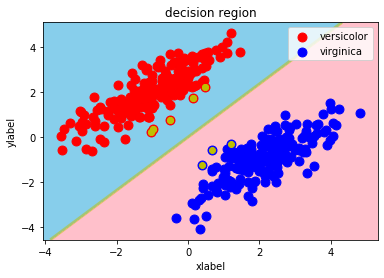

In [13]:
decision_region(X_train, y_train, model)

# SVMとはどのような仕組みか

スクラッチ実装に必要な情報は以上ですが、大まかな仕組みの解説を行います。


SVMは決定境界と近くの点の距離（マージン）を最大化する方法です。特徴量が2つであれば以下の図のように線を引くことを考えます。

# 他のカーネル関数の実装


## 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。